In [57]:
import pandas as pd
import numpy as np
import datetime as dt
import ast
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:

order = pd.read_csv("data/transactions.csv")
customer = pd.read_csv("data/customer.csv")
product = pd.read_csv("data/product.csv")

In [36]:
order_re = order[['created_at', 'customer_id', 'total_amount', 'product_metadata', 'payment_status']]
def parse_metadata(metadata_str):
    try:
        metadata = ast.literal_eval(metadata_str)
        
        product_ids = []
        quantities = []
        item_prices = []

        item = metadata[0]
        product_ids.append(item.get('product_id'))
        quantities.append(item.get('quantity'))
        item_prices.append(item.get('item_price'))
        
        return pd.Series([
            ','.join(map(str, product_ids)),
            ','.join(map(str, quantities)),
            ','.join(map(str, item_prices))
        ])
    except (ValueError, SyntaxError, TypeError):
        return pd.Series([None, None, None])

order_re[['product_id', 'quantity', 'item_price']] = order_re['product_metadata'].apply(parse_metadata)
order_re = order_re.rename({"created_at" : "order_date"}, axis = "columns")
print(order_re)

order_re["order_date"] = pd.to_datetime(order_re["order_date"])
order_re["order_date(bool)"] = order_re["order_date"].dt.strftime("%Y-%m-%d")
order_re["order_date_m"] = order_re["order_date"].dt.strftime("%Y-%m")
order_re["order_date_y"] = order_re["order_date"].dt.strftime("%Y")

order_re = order_re[(order_re["order_date_y"]== "2020") | (order_re["order_date_y"]== "2021") | (order_re["order_date_y"]== "2022")]
order_re.head(3)

order_f = order_re[['order_date(bool)','order_date_m', 'customer_id','total_amount', 'product_id', 'quantity', 'payment_status',   ]]
print(order_f)

C:\Users\oreo\AppData\Local\Temp\ipykernel_22480\3936982970.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_re[['product_id', 'quantity', 'item_price']] = order_re['product_metadata'].apply(parse_metadata)
C:\Users\oreo\AppData\Local\Temp\ipykernel_22480\3936982970.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_re[['product_id', 'quantity', 'item_price']] = order_re['product_metadata'].apply(parse_metadata)
C:\Users\oreo\AppData\Local\Temp\ipykernel_22480\3936982970.py:28: SettingWith

                         order_date  customer_id  total_amount  \
0       2018-07-29T15:22:01.458193Z         5868        199832   
1       2018-07-30T12:40:22.365620Z         4774        155526   
2       2018-09-15T11:51:17.365620Z         4774        550696   
3       2018-11-01T11:23:48.365620Z         4774        271012   
4       2018-12-18T11:20:30.365620Z         4774        198753   
...                             ...          ...           ...   
852579  2021-09-21T22:10:05.074873Z        25121        226820   
852580  2021-12-09T07:35:18.222046Z        34829        359203   
852581  2021-12-11T01:20:36.944593Z        99645       1158159   
852582  2019-12-18T11:01:09.623382Z        87319        184143   
852583  2019-12-19T12:47:14.701215Z        58180        365963   

                                         product_metadata payment_status  \
0       [{'product_id': 54728, 'quantity': 1, 'item_pr...        Success   
1       [{'product_id': 16193, 'quantity': 1, 'item_pr.

In [38]:
product_re = product[['id', 'masterCategory', 'subCategory', 'articleType', 'season', 'usage']]

product_re = product_re.rename({"id" : "product_id"} ,axis = "columns")
product_re = product_re.rename({"masterCategory" : "ctgr1"} ,axis = "columns")
product_re = product_re.rename({"subCategory" : "ctgr2"} ,axis = "columns")
product_re = product_re.rename({"articleType" : "type"} ,axis = "columns")
product_f = product_re


customer_re = customer[['customer_id', 'gender', 'home_country', 'first_join_date', 'birthdate']]

customer_re["first_join_date"] = pd.to_datetime(customer_re["first_join_date"])
customer_re["birthdate"] = pd.to_datetime(customer_re["birthdate"])

customer_re["first_dt(bool)"] = customer_re["first_join_date"].dt.strftime("%Y-%m-%d")
customer_re["birth_dt_y"] = customer_re["birthdate"].dt.strftime("%Y")

customer_f = customer_re[['customer_id', 'gender', 'home_country', 'first_dt(bool)', 'birth_dt_y']]

customer_f["birth_dt_y"] = customer_f["birth_dt_y"].astype(int)
customer_f['age'] = 2024 - customer_f["birth_dt_y"]

def agerange(row):
    age = row["age"]

    if age < 10:
        return "10세 미만"
    if (age >= 10) and  (age < 20):
        return "10대"
    if (age >= 20) and  (age < 30):
        return "20대"
    if (age >= 30) and  (age < 40):
        return "30대"
    if (age >= 40) and  (age < 50):
        return "40대"  
    if (age >= 50) and  (age < 60):
        return "50대"  
    if (age >= 60) and  (age < 100):
        return "60대 이상"
    else:
        return "기타"

customer_f["range"] = customer_f.apply(agerange, axis = "columns")
customer_f.head()

C:\Users\oreo\AppData\Local\Temp\ipykernel_22480\3798528504.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_re["first_join_date"] = pd.to_datetime(customer_re["first_join_date"])
C:\Users\oreo\AppData\Local\Temp\ipykernel_22480\3798528504.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_re["birthdate"] = pd.to_datetime(customer_re["birthdate"])
C:\Users\oreo\AppData\Local\Temp\ipykernel_22480\3798528504.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,customer_id,gender,home_country,first_dt(bool),birth_dt_y,age,range
0,2870,F,Indonesia,2019-07-21,1996,28,20대
1,8193,F,Indonesia,2017-07-16,1993,31,30대
2,7279,M,Indonesia,2020-08-23,1989,35,30대
3,88813,M,Indonesia,2021-10-03,1991,33,30대
4,82542,M,Indonesia,2021-04-11,2000,24,20대


In [40]:
order_f

,order_date(bool),order_date_m,customer_id,total_amount,product_id,quantity,payment_status
13,2020-02-14,2020-02,4774,2108413,35062,1,Success
14,2020-04-01,2020-04,4774,464824,43820,1,Success
15,2020-05-18,2020-05,4774,374701,19341,1,Success
16,2020-07-04,2020-07,4774,126784,17601,1,Success
17,2020-08-20,2020-08,4774,175789,43711,1,Success
...,...,...,...,...,...,...,...
852575,2022-07-07,2022-07,99675,485334,35318,1,Success
852578,2020-11-12,2020-11,25121,287688,42915,1,Success
852579,2021-09-21,2021-09,25121,226820,30642,2,Failed
852580,2021-12-09,2021-12,34829,359203,19394,1,Success


In [42]:
order_p = pd.merge(order_f, product_f, on = "product_id", how = "left")
merge = pd.merge(order_p, customer_f, on = "customer_id" , how = "left")

merge.isnull().sum()
merge_na = merge.dropna(axis = 0)

In [43]:
pd.concat([merge_na.ctgr1.value_counts(),merge_na.ctgr1.value_counts(normalize=True)], axis = 1)
pd.concat([merge_na.loc[merge_na.ctgr1 == "Apparel", ["ctgr2"]].value_counts(),
           merge_na.loc[merge_na.ctgr1 == "Apparel", ["ctgr2"]].value_counts(normalize = True)], axis = 1)
pd.concat([merge_na.loc[merge_na.ctgr1 == "Accessories", ["ctgr2"]].value_counts(),
           merge_na.loc[merge_na.ctgr1 == "Accessories", ["ctgr2"]].value_counts(normalize = True)], axis = 1)
           
pd.concat([merge_na.loc[merge_na.ctgr1 == "Footwear", ["ctgr2"]].value_counts(),
           merge_na.loc[merge_na.ctgr1 == "Footwear", ["ctgr2"]].value_counts(normalize = True)], axis = 1)

pd.concat([merge_na.usage.value_counts(), merge_na.usage.value_counts(normalize = True)], axis = 1)

pd.concat([merge_na.season.value_counts(), merge_na.season.value_counts(normalize = True)], axis = 1)

merge_na.gender.value_counts()
merge_na.range.value_counts()

range
20대       305573
30대       206600
10대        60368
40대        41618
50대         4499
10세 미만       181
60대 이상       166
Name: count, dtype: int64

In [45]:
order_cnt_peruser = merge_na.groupby("customer_id").agg( order_cnt = ("order_date(bool)", "count") )

apparel_top = merge_na[(merge_na.ctgr1 == "Apparel") & (merge_na.ctgr2 == "Topwear")].groupby("customer_id")["ctgr2"].count()
apparel_bottom = merge_na[(merge_na.ctgr1 == "Apparel") & (merge_na.ctgr2 == "Bottomwear")].groupby("customer_id")["ctgr2"].count()
apparel_inner = merge_na[(merge_na.ctgr1 == "Apparel") & (merge_na.ctgr2 == "Innerwear")].groupby("customer_id")["ctgr2"].count()
apparel_etc = merge_na[(merge_na.ctgr1 == "Apparel") & ~(merge_na.ctgr2 == "Innerwear")& ~(merge_na.ctgr2 == "Bottomwear")& ~(merge_na.ctgr2 == "Topwear")].groupby("customer_id")["ctgr2"].count()

season_spring = merge_na[merge_na.season == "Spring" ].groupby("customer_id")["season"].count()
season_summer = merge_na[merge_na.season == "Summer" ].groupby("customer_id")["season"].count()
season_fall = merge_na[merge_na.season == "Fall" ].groupby("customer_id")["season"].count()
season_winter = merge_na[merge_na.season == "Winter" ].groupby("customer_id")["season"].count()

acc = merge_na[merge_na.ctgr1 == "Accessories"].groupby("customer_id")["ctgr2"].count()
foot = merge_na[merge_na.ctgr1 == "Footwear"].groupby("customer_id")["ctgr2"].count()

gender_f = merge_na[merge_na.gender == "F" ].groupby("customer_id")["gender"].count()
gender_m = merge_na[merge_na.gender == "M" ].groupby("customer_id")["gender"].count()

range_below10 = merge_na[(merge_na.range == "10세 미만") | (merge_na.range == "10대")  ].groupby("customer_id")["range"].count()
range_20 = merge_na[merge_na.range == "20대" ].groupby("customer_id")["range"].count()
range_30 = merge_na[merge_na.range == "30대" ].groupby("customer_id")["range"].count()
range_more40 = merge_na[(merge_na.range == "40대") | (merge_na.range == "50대") | (merge_na.range == "60대 이상") ].groupby("customer_id")["range"].count()

apparel_top = apparel_top.to_frame().reset_index().rename(columns = {'ctgr2':'apparel_top'})
apparel_bottom = apparel_bottom.to_frame().reset_index().rename(columns = {'ctgr2':'apparel_bottom'})
apparel_inner = apparel_inner.to_frame().reset_index().rename(columns = {'ctgr2':'apparel_inner'})
apparel_etc = apparel_etc.to_frame().reset_index().rename(columns = {'ctgr2':'apparel_etc'})

acc = acc.to_frame().reset_index().rename(columns = {'ctgr2':'acc'})
foot = foot.to_frame().reset_index().rename(columns = {'ctgr2':'foot'})

season_spring = season_spring.to_frame().reset_index().rename(columns = {'season':'season_spring'})
season_summer = season_summer.to_frame().reset_index().rename(columns = {'season':'season_summer'})
season_fall = season_fall.to_frame().reset_index().rename(columns = {'season':'season_fall'})
season_winter = season_winter.to_frame().reset_index().rename(columns = {'season':'season_winter'})

gender_f = gender_f.to_frame().reset_index().rename(columns = {'gender':'gender_f'})
gender_m = gender_m.to_frame().reset_index().rename(columns = {'gender':'gender_m'})

range_below10 = range_below10.to_frame().reset_index().rename(columns = {'range':'range_below10'})
range_20 = range_20.to_frame().reset_index().rename(columns = {'range':'range_20'})
range_30 = range_30.to_frame().reset_index().rename(columns = {'range':'range_30'})
range_more40 = range_more40.to_frame().reset_index().rename(columns = {'range':'range_more40'})

merge_all = pd.merge(order_cnt_peruser,apparel_top, how ='left', on = 'customer_id' )
merge_all1 = pd.merge(merge_all,apparel_bottom, how ='left', on = 'customer_id' )
merge_all2 = pd.merge(merge_all1,apparel_inner, how ='left', on = 'customer_id' )
merge_all3 = pd.merge(merge_all2,acc, how ='left', on = 'customer_id' )
merge_all4 = pd.merge(merge_all3,foot, how ='left', on = 'customer_id' )
merge_all5 = pd.merge(merge_all4,season_spring, how ='left', on = 'customer_id' )
merge_all6 = pd.merge(merge_all5,season_summer, how ='left', on = 'customer_id' )
merge_all7 = pd.merge(merge_all6,season_fall, how ='left', on = 'customer_id' )
merge_all8 = pd.merge(merge_all7,season_winter, how ='left', on = 'customer_id' )
merge_all9 = pd.merge(merge_all8,gender_f, how ='left', on = 'customer_id' )
merge_all10 = pd.merge(merge_all9,gender_m, how ='left', on = 'customer_id' )
merge_all11 = pd.merge(merge_all10,range_below10, how ='left', on = 'customer_id' )
merge_all12 = pd.merge(merge_all11,range_20, how ='left', on = 'customer_id' )
merge_all13 = pd.merge(merge_all12,range_30, how ='left', on = 'customer_id' )
merge_all_f = pd.merge(merge_all13,range_more40, how ='left', on = 'customer_id' )

merge_all_f.fillna(0, inplace = True)

merge_all_f

,customer_id,order_cnt,apparel_top,apparel_bottom,apparel_inner,acc,foot,season_spring,season_summer,season_fall,season_winter,gender_f,gender_m,range_below10,range_20,range_30,range_more40
0,3,33,16.0,0.0,1.0,9.0,3.0,2.0,15.0,9.0,7.0,0.0,33.0,0.0,0.0,33.0,0.0
1,8,7,4.0,0.0,0.0,0.0,1.0,1.0,3.0,2.0,1.0,7.0,0.0,0.0,7.0,0.0,0.0
2,9,6,3.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0,1.0,6.0,0.0,6.0,0.0,0.0,0.0
3,11,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,15,4,2.0,0.0,0.0,0.0,2.0,0.0,1.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45994,99991,3,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,3.0,0.0
45995,99992,12,8.0,0.0,1.0,0.0,2.0,1.0,5.0,6.0,0.0,12.0,0.0,0.0,0.0,0.0,12.0
45996,99995,60,28.0,1.0,1.0,15.0,7.0,5.0,29.0,16.0,10.0,60.0,0.0,60.0,0.0,0.0,0.0
45997,99997,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [53]:
merge_all_ff = merge_all_f[(merge_all_f["apparel_top"] < 35) & (merge_all_f["acc"] < 26)]

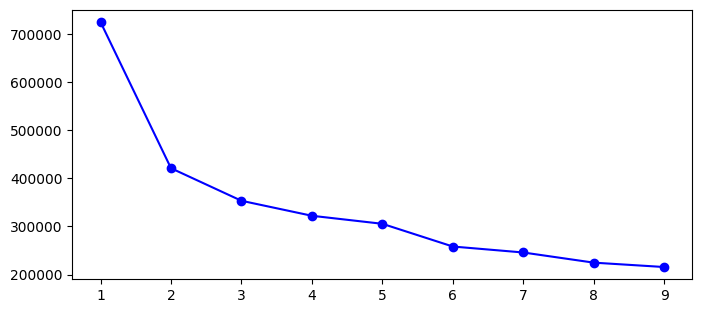

In [54]:
merge_all_ff = merge_all_ff.reset_index()

scaler = StandardScaler()
scaler.fit(merge_all_ff.iloc[:,2:])
np_train_scaled = scaler.transform(merge_all_ff.iloc[:,2:])
np_train_scaled

kmeans = KMeans(n_clusters=6)
y_pred = kmeans.fit_predict(np_train_scaled)
kmeans.cluster_centers_

kmeans_per_k = [KMeans(n_clusters=k).fit(np_train_scaled) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.show()

In [70]:
kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(np_train_scaled)
kmeans.cluster_centers_
y_pred

pd.DataFrame(y_pred)
merge_all_ff['clstResult'] = pd.Series(y_pred)
merge_all_ff.head()

merge_all_ff.groupby('clstResult').agg(
    cnt_customer = ('customer_id','count'),
    avg_order_cnt = ('order_cnt','mean'),
    apparel_top_avg = ('apparel_top','mean'),
    apparel_bottom_avg = ('apparel_bottom','mean'),
    apparel_inner_avg = ('apparel_inner','mean'),
    acc_avg = ('acc','mean'),    
    foot_avg = ('foot','mean'),
    season_spring_avg = ('season_spring','mean'),
    season_summer_avg = ('season_summer','mean'),
    season_fall_avg = ('season_fall','mean'),
    season_winter_avg = ('season_winter','mean'),
    gender_f_avg = ('gender_f','mean'),
    gender_m_avg = ('gender_m','mean'),
    range_below10_avg = ('range_below10','mean'),
    range_20_avg = ('range_20','mean'),
    range_30_avg = ('range_30','mean'),
    range_more40_avg = ('range_more40','mean'))

,cnt_customer,avg_order_cnt,apparel_top_avg,apparel_bottom_avg,apparel_inner_avg,acc_avg,foot_avg,season_spring_avg,season_summer_avg,season_fall_avg,season_winter_avg,gender_f_avg,gender_m_avg,range_below10_avg,range_20_avg,range_30_avg,range_more40_avg
clst_k4,,,,,,,,,,,,,,,,,
0,33528,4.535523,1.596457,0.267895,0.177851,1.155303,0.948222,0.275650,2.220860,1.170544,0.868468,2.895610,1.639913,0.412491,2.233148,1.545962,0.343921
1,2857,58.840742,20.296115,3.765838,2.441022,14.798040,12.502275,3.649282,28.445222,15.248512,11.497725,37.667133,21.173609,5.548827,29.160308,19.925796,4.205810
2,8935,24.502966,8.511248,1.510688,1.042417,6.217683,5.119866,1.519194,11.938668,6.318523,4.726581,15.777616,8.725350,2.449021,11.845215,8.314382,1.894348
